In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

In [3]:
df=sm.datasets.sunspots.load_pandas().data

In [4]:
print(dir(sm.datasets))

['PytestTester', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'anes96', 'cancer', 'ccard', 'check_internet', 'china_smoking', 'clear_data_home', 'co2', 'committee', 'copper', 'cpunish', 'danish_data', 'elnino', 'engel', 'fair', 'fertility', 'get_data_home', 'get_rdataset', 'grunfeld', 'heart', 'interest_inflation', 'longley', 'macrodata', 'modechoice', 'nile', 'randhie', 'scotland', 'spector', 'stackloss', 'star98', 'statecrime', 'strikes', 'sunspots', 'test', 'utils', 'webuse']


In [5]:
df.shape

(309, 2)

In [6]:
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [7]:
df.set_index('YEAR',inplace=True)

Text(0.5, 1.0, 'Sunspot data from year 1700 to 2008')

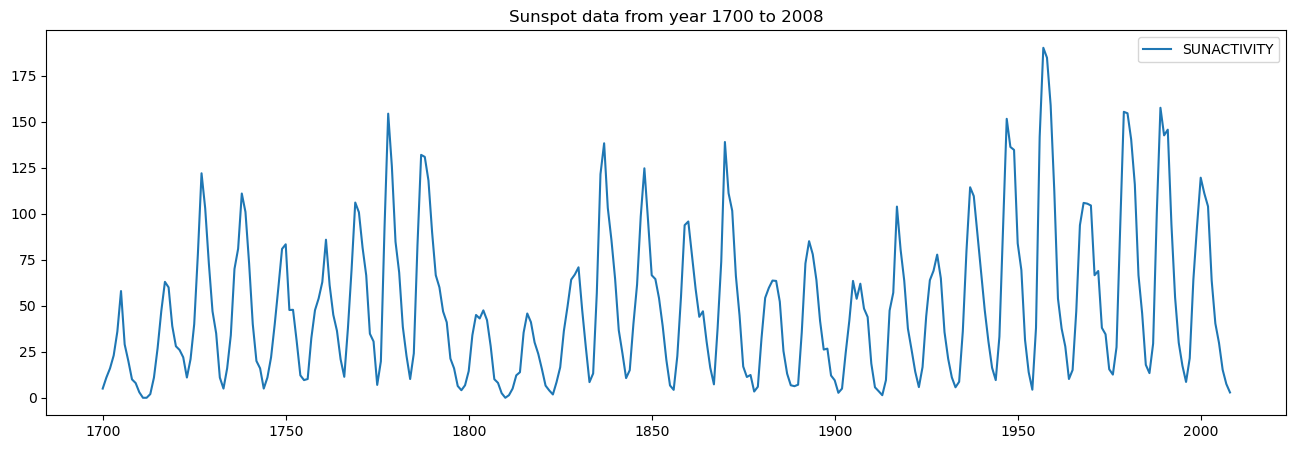

In [8]:
plt.figure(figsize=(16,5))
plt.plot(df.index,df['SUNACTIVITY'],label='SUNACTIVITY')
plt.legend(loc='best')
plt.title('Sunspot data from year 1700 to 2008')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(timeseries):
    print('Result of dickyFuller test :- ')
    dftest=adfuller(timeseries , autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test statistics','p-value','lags-used','Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)   

In [11]:
adf_test(df['SUNACTIVITY'])

Result of dickyFuller test :- 
Test statistics                -2.837781
p-value                         0.053076
lags-used                       8.000000
Number of observation used    300.000000
Critical Value (1%)            -3.452337
Critical Value (5%)            -2.871223
Critical Value (10%)           -2.571929
dtype: float64


In [21]:
# Test statistics  < critical Values
# p-value < 0.05
# so it is non statinary data


In [22]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
# Step 1: Retrieve Time Series Data
start_date = '2020-01-01'
end_date = '2024-01-01'
ticker = 'AAPL'  # Example: Apple stock data
data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)


TypeError: string indices must be integers, not 'str'

In [ ]:
# Step 2: Visualize the Data
data['Close'].plot(figsize=(10, 6))
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Step 3: Calculate Moving Averages
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_mean.plot(figsize=(10, 6))
plt.title('30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Step 4: Fit Trend Lines (Optional)
# Use regression techniques such as Ordinary Least Squares (OLS) from statsmodels

# Step 5: Decompose the Time Series
result = seasonal_decompose(data['Close'], model='additive', period=30)  # Assuming a periodicity of 30 days
result.plot()
plt.show()